Digital Signal Processing Courseware: An Introduction (copyright © 2024)
## Authors: J. Christopher Edgar and Gregory A. Miller

Originally written in Mathematica by J. Christopher Edgar. Conversion to Jupyter Notebook by Song Liu.

The authors of this courseware are indebted to Prof. Bruce Carpenter (University of Illinois Urbana-Champaign). Bruce inspired the creation of this courseware, he consulted with the authors as this courseware was being developed, and he provided the original version of the code and text for several sections of this courseware (e.g. the section on complex numbers and the section on normal distributions). 

# <font color=red>DSP.02) Sampling Rate and Aliasing</font>

# <font color=red>Give it a Try!
# <font color=red>Part 2

### Setup

In [1]:
# general imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as img
from matplotlib import cm
from mpl_toolkits import mplot3d
from scipy.fft import fft, fftfreq
import matplotlib.patches as patches
import math
import cmath
import pandas as pd
from sympy import Symbol, sin, series
from sympy import roots, solve_poly_system
import scipy.special

import warnings
warnings.filterwarnings('ignore')

# Figure size 
plt.rc("figure", figsize=(8, 6))

#function to create time course figure
#one waveform
def make_plot_1(x1,y1,type="b",linewidth = 1): 
    plt.plot(x1, y1,type)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#two overlaid waveforms with red and blue   
def make_plot_2(x1,y1,type1,x2,y2,type2): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#three overlaid waveforms with red, blue and green   
def make_plot_3(x1,y1,type1,x2,y2,type2,x3,y3,type3): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.plot(x3, y3, type3)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
def make_plot_3d(ax,x,y,z):    
    ax.contour3D(x, y, z, 50, cmap=cm.coolwarm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
def make_plot_freq_1(x1,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf = fft(x1)
    xf = fftfreq(N, 1 / sample_rate)
    yf = yf[0:Nhalf]
    xf = xf[0:Nhalf]
    plt.plot(xf, np.abs(yf))
    
#two spectrums
def make_plot_freq_2(x1,x2,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf1 = fft(x1)
    yf2 = fft(x2)
    xf = fftfreq(N, 1 / sample_rate)

    yf1 = yf1[0:Nhalf]
    yf2 = yf2[0:Nhalf]
    xf = xf[0:Nhalf]

    plt.plot(xf, np.abs(yf1))
    plt.plot(xf, np.abs(yf2), color = 'r')
    
def make_imshow(x):
    plt.imshow(x,cmap='Greys_r')
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def make_imshow_color(x):
    plt.imshow(x)
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def round_complex(x):
    return complex(np.round(x.real,4),np.round(x.imag,4))

## <font color=red>DSP.02.G2) Sampling Rates</font>

### <font color=red>DSP.02.G2.a) Sampling at exactly twice the Nyquist frequency</font>

Nyquist's Rule requires that we sample at least twice the fastest frequency present in the original
waveform. What happens if we sample at exactly twice the fastest frequency present in the waveform?

Produce a 50 Hz wave and set the sampling rate to (1) 200 Hz and then (2) 100 Hz, with the 50 Hz wave starting at phase = 0.

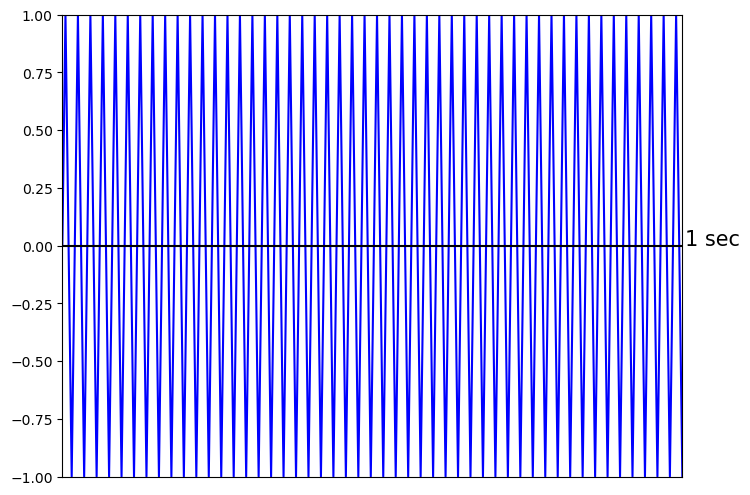

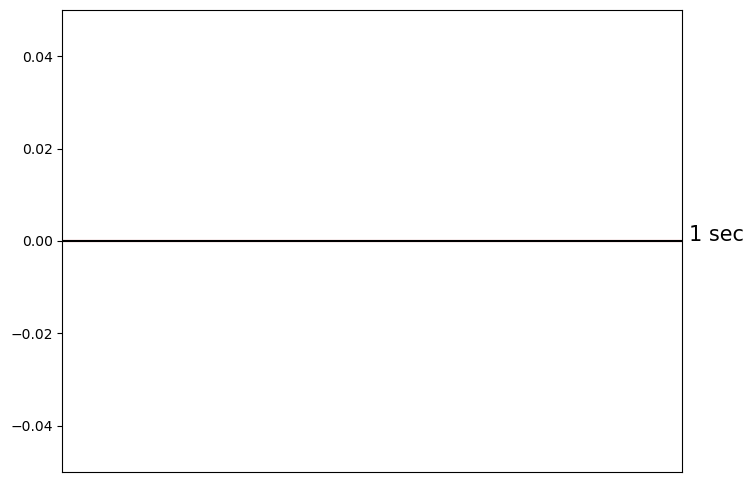

In [2]:
time1 = np.arange(0,1,1/200)  #collecting 200 samples in a 1 second period: 200 samples x 5 ms per sample = 1000 ms
freq = 50
timeseries1 = np.sin(2*np.pi * freq * time1)

make_plot_1(time1,timeseries1)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

time2 = np.arange(0,1,1/100)   #collecting 100 samples in a 1 second period: 100 samples x 10 ms per sample = 1000 ms
timeseries2 = np.round_(np.sin(2*np.pi * freq * time2),2)

make_plot_1(time2,timeseries2,'red')
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

The first plot shows shows the waveform digitized at 200 Hz. The second plot shows the waveform digitized at 100 Hz.

Describe what happened in the second plot, and then adjust the code above to fix this problem.

### <font color=red>DSP.02.G2.b) Removing Noise</font>

The following timeseries shows data collected at 150 Hz that contains activity at several frequencies.

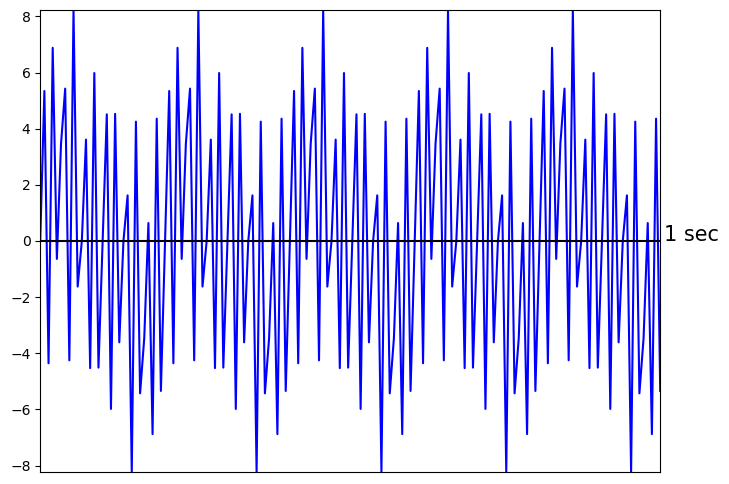

In [3]:
time = np.arange(0,1,1/150)  #collecting 150 samples in a 1 second period

# Finding amplitude at each time
timeseries = np.sin(2*np.pi * 5 * time) + np.sin(2*np.pi * 10 * time) + 6 * np.sin(2*np.pi * 60 * time) \
+ np.sin(2*np.pi * 5 * time) + np.sin(2*np.pi * 40 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

The frequency spectrum of that signal, below, shows lots of peaks. One is a big peak at 60 Hz.

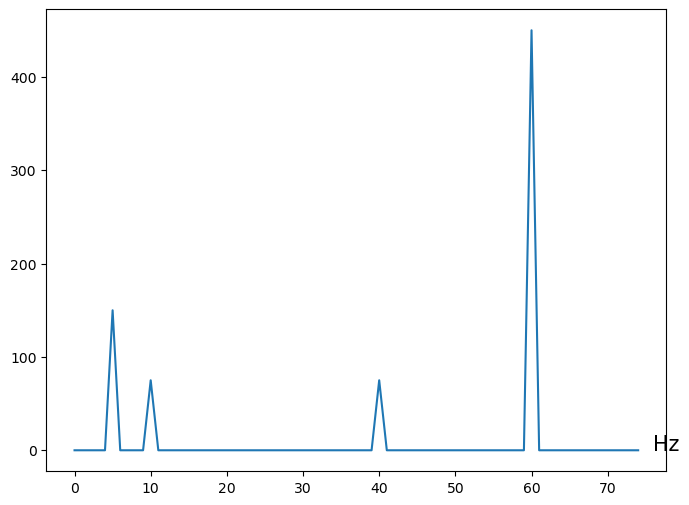

In [4]:
make_plot_freq_1(timeseries,150)

# Adding text to the figure
plt.text(76,0,'Hz',fontsize=15)
plt.show()

If you knew in advance that you had to deal with a 60 Hz noise signal, and if you knew that the highest
frequency of real activity in the recording was less than 50 Hz, show how you can easily remove the 60
Hz noise.